### Prepare daily dataset
Based on downloaded failes with prices of selected currencies notebook prepare set with all currencies and daily change of price as percentage.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data(currency_name):
    file_name = '../'+currency_name+'.csv'
    
    df = pd.read_csv(file_name)
    df['date'] = pd.to_datetime(df['date'], utc=True, infer_datetime_format = True)

    df = df.sort_values('date', ascending = True)
    
    return df


def close_price_percentage_change(row):
    cp = row['close_price']
    cpc = row['price_change']
    
    #prevoiuse price
    pp = cp-cpc
    
    return cpc/pp*100


def extract_percentage_changes(df):
    # Extract required columns
    cp_df = df[['date', 'close_price']]
    cp = cp_df['close_price']

    # Add difference between days as column
    cp_df.loc[:,'price_change']=cp.diff()
    
    # Add percentage change as  column
    cp_df.loc[:,'percentage_change']=cp_df.apply(lambda row: close_price_percentage_change(row), axis=1)
    
    # Remove obsolete columns
    result_df = cp_df.drop(['close_price', 'price_change'], axis=1)
    
    return result_df


In [3]:
# Load and process data for selected currencies
currencies = ['ETH', 'BTC', 'XRP', 'LTC', 'DASH']

# Dictionary containing data frames for each currency
dfs = {}

for _, c in enumerate(currencies):
    print "Loading: "+c
    df = load_data(c)
    dfs[c] = extract_percentage_changes(df).rename(columns = {'percentage_change': c})
    
    
    

Loading: ETH


/home/dev/anaconda3/envs/mn_nanodegree/lib/python2.7/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/dev/anaconda3/envs/mn_nanodegree/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Loading: BTC
Loading: XRP
Loading: LTC
Loading: DASH


In [4]:
def join_currencies_by_date(c1_df, c2_df):
    return pd.merge(c1_df, c2_df, on=['date'], how='outer')


ac_df = dfs['ETH']

for c in dfs:
    if c=='ETH':
        continue
    
    ac_df = join_currencies_by_date(ac_df, dfs[c])

ac_df = ac_df.sort_values('date', ascending = True).dropna()
    
display(ac_df.tail())

,date,ETH,LTC,DASH,XRP,BTC
820,2017-11-04,-1.714043,-2.029192,-1.403496,-2.105865,2.388953
821,2017-11-05,-1.401138,-0.526890,-0.549731,-0.831902,0.372089
822,2017-11-06,0.887734,0.767123,0.918842,1.947490,-5.192773
823,2017-11-07,-1.415236,11.111111,6.420488,2.118549,1.731798
824,2017-11-08,4.890382,2.071778,7.822619,3.367181,4.413399


In [5]:
# Define labels. 1 when eth price growth is bigger then 3
y = ac_df['ETH'].apply(lambda e: e>3).map({True: 1, False: 0})


In [6]:
ac_df.describe()

,ETH,LTC,DASH,XRP,BTC
count,824.000000,824.000000,824.000000,824.000000,824.000000
mean,0.920014,0.475404,0.716709,0.693835,0.462475
std,8.059214,5.647949,5.813453,9.067882,3.551501
min,-72.804152,-32.642151,-21.590494,-46.004676,-18.741098
25%,-2.581657,-1.247301,-2.179047,-1.758197,-0.678408
50%,-0.130492,0.000000,0.000000,-0.395146,0.293414
75%,3.370367,1.351631,2.982844,1.497623,1.784315
max,51.034374,66.587112,44.644982,179.366892,23.936079


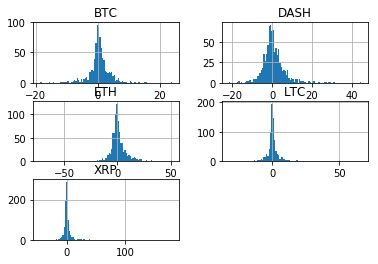

In [7]:
ac_df.hist(bins=100)
plt.show()

,ETH,LTC,DASH,XRP,BTC
ETH,1.000000,0.175440,0.233080,0.050170,0.256867
LTC,0.175440,1.000000,0.253790,0.209570,0.513521
DASH,0.233080,0.253790,1.000000,0.024760,0.359943
XRP,0.050170,0.209570,0.024760,1.000000,0.156077
BTC,0.256867,0.513521,0.359943,0.156077,1.000000


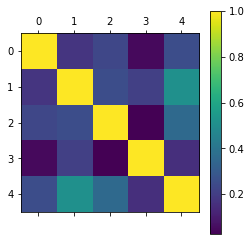

In [8]:
display(ac_df.corr())

cax = plt.matshow(ac_df.corr())
plt.colorbar(cax)
plt.show()

In [9]:
# Save result set
ac_df.to_csv('daily_percentage_change.csv', index=False)